In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/sales_data.csv')
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   72 non-null     object 
 1   Sales   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [5]:
df['Years'] = pd.to_datetime(df['Years'])
df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [6]:
df['Time'] = np.arange(1, 73, 1)

In [7]:
df.head()

,Years,Sales,Time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [8]:
df['month_name'] =df['Years'].dt.month_name()

In [9]:
df.head(15)

,Years,Sales,Time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May
5,2001-06-01,228.6,6,June
6,2001-07-01,215.9,7,July
7,2001-08-01,190.5,8,August
8,2001-09-01,177.8,9,September
9,2001-10-01,139.7,10,October


#### Split Data into Train and Test

In [10]:
df_train = df.head(48) # 4 Years
df_test = df.loc[48:] # 2 Years

In [11]:
df_train.head()

,Years,Sales,Time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [12]:
df_test.head()

,Years,Sales,Time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [13]:
X_train = df_train[['Time']].values
X_train.shape

(48, 1)

In [14]:
Y_train = df_train[['Sales']].values
Y_train.shape

(48, 1)

In [15]:
X_test = df_test[['Time']].values
Y_test = df_test[['Sales']].values

#### Linear Regression with Time -- Trend in the Data

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model_trend = LinearRegression()
model_trend.fit(X_train, Y_train)

LinearRegression()

In [18]:
Y_train_Fitted  = model_trend.predict(X_train)

In [19]:
Y_forecast  = model_trend.predict(X_test)

### For 95% CI Z=1.96

In [20]:
Error = Y_train - Y_train_Fitted
SE = Error.std()
ME = 1.96 * SE

In [21]:
ME

111.6091961636738

In [22]:
CI_Plus = Y_forecast + ME
CI_Mins = Y_forecast - ME

In [23]:
CI_Plus.shape

(24, 1)

In [24]:
CI_Mins.ravel().shape

(24,)

In [25]:
df_test['Years'].shape

(24,)

### Visualize the Data

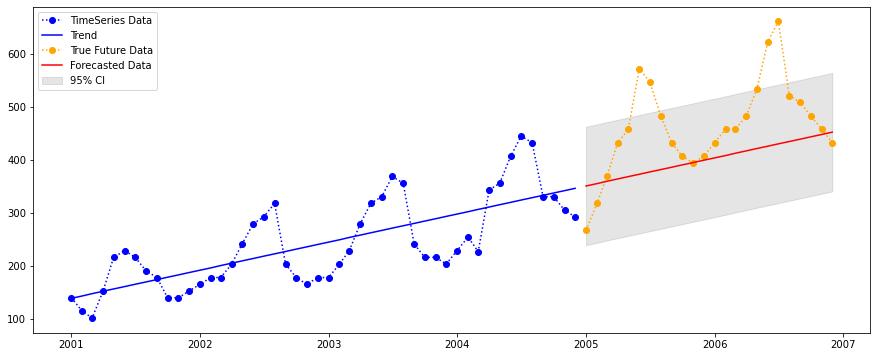

In [26]:
plt.figure(figsize=(15,6))
# Fitted Data
plt.plot(df_train['Years'], Y_train, 'bo:')
plt.plot(df_train['Years'], Y_train_Fitted, 'b')

# Forecasted Data
plt.plot(df_test['Years'], Y_test, 'o:', color='orange')
plt.plot(df_test['Years'], Y_forecast, 'red')

# Margin of Error
CI_Plus = Y_forecast + ME
CI_Mins = Y_forecast - ME

plt.fill_between(df_test['Years'],(CI_Plus.ravel()),(CI_Mins.ravel()), alpha=0.1, color='black')
plt.legend(['TimeSeries Data', 'Trend', 'True Future Data', 'Forecasted Data', '95% CI'])
plt.show()


In [27]:
forecast_mean = model_trend.predict(np.array([[61]]))

In [28]:
(forecast_mean - ME), (forecast_mean + ME)

(array([[291.67694148]]), array([[514.89533381]]))

### Additive Modelling

In [29]:
df_train.head()

,Years,Sales,Time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


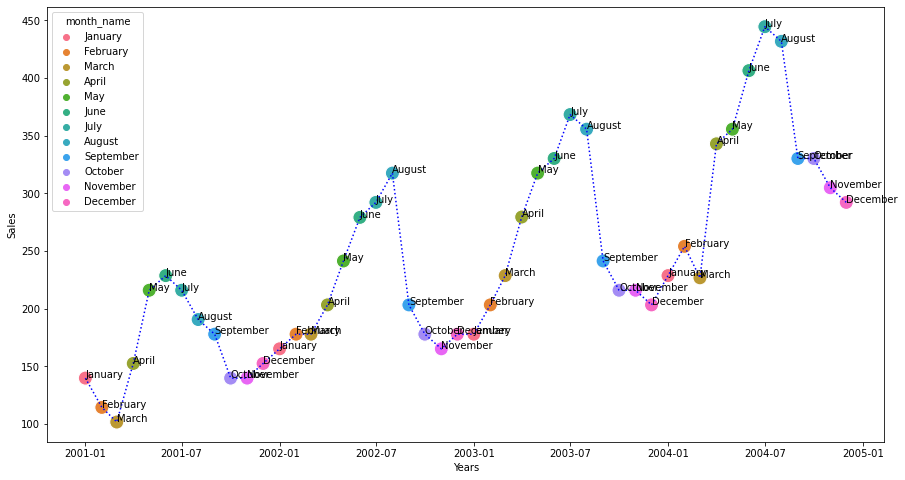

In [30]:
plt.figure(figsize=(15,8))
plt.plot(df_train['Years'], df_train['Sales'], 'b:')
sns.scatterplot('Years', 'Sales', data=df_train, s=200, hue='month_name')
for i in range(len(df_train)):
    plt.text(df_train['Years'][i], df_train['Sales'][i], df_train['month_name'][i])
plt.show()

In [31]:
dum = pd.get_dummies(df_train['month_name'], drop_first=True)
df_train1 = df_train.copy()
df_train1 = pd.concat((df_train1, dum), axis=1)

In [32]:
df_train1.head()

,Years,Sales,Time,month_name,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,February,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,March,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,April,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,May,0,0,0,0,0,0,0,1,0,0,0


In [33]:
dum = pd.get_dummies(df_test['month_name'], drop_first=True)
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1, dum), axis=1)

In [34]:
df_test1.head()

,Years,Sales,Time,month_name,August,December,February,January,July,June,March,May,November,October,September
48,2005-01-01,266.7,49,January,0,0,0,1,0,0,0,0,0,0,0
49,2005-02-01,317.5,50,February,0,0,1,0,0,0,0,0,0,0,0
50,2005-03-01,368.3,51,March,0,0,0,0,0,0,1,0,0,0,0
51,2005-04-01,431.8,52,April,0,0,0,0,0,0,0,0,0,0,0
52,2005-05-01,457.2,53,May,0,0,0,0,0,0,0,1,0,0,0


#### Split the Data Into Train and Test

In [35]:
cols = ['Time', 'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September']
X_train_add = df_train1[cols].values
X_test_add = df_test1[cols].values
y_train_add = df_train1['Sales'].values
y_test_add = df_test1['Sales'].values

In [36]:
(X_train_add.shape, X_test_add.shape), (y_train_add.shape, y_test_add.shape)

(((48, 12), (24, 12)), ((48,), (24,)))

#### Additive Model (Linear Regression)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model_add = LinearRegression()
model_add.fit(X_train_add, y_train_add)

LinearRegression()

In [39]:
# Fitted Values
y_fittedValue_add = model_add.predict(X_train_add)
# Forecasted Values
y_forecast_add = model_add.predict(X_test_add)

In [40]:
error_std = y_train_add - y_fittedValue_add
SE = error_std.std()
ME = 1.96 * SE

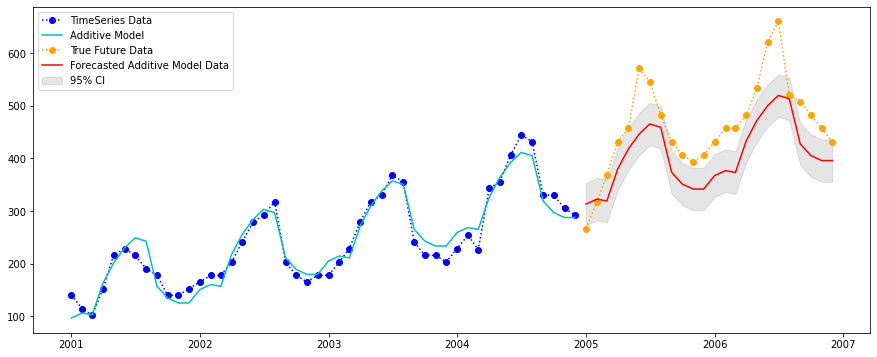

In [41]:
plt.figure(figsize=(15,6))
# Fitted Data
plt.plot(df_train1['Years'], y_train_add, 'bo:')
plt.plot(df_train1['Years'], y_fittedValue_add, 'c')

# Forecasted Data
plt.plot(df_test1['Years'], y_test_add, 'o:', color='orange')
plt.plot(df_test1['Years'], y_forecast_add, 'red')

# Margin of Error
CI_Plus = y_forecast_add + ME
CI_Mins = y_forecast_add - ME

plt.fill_between(df_test1['Years'],(CI_Plus.ravel()),(CI_Mins.ravel()), alpha=0.1, color='black')
plt.legend(['TimeSeries Data', 'Additive Model', 'True Future Data', 'Forecasted Additive Model Data', '95% CI'])
plt.show()

#### Multipicative Model For Forecasting

In [42]:
df_train.tail()

,Years,Sales,Time,month_name
43,2004-08-01,431.8,44,August
44,2004-09-01,330.2,45,September
45,2004-10-01,330.2,46,October
46,2004-11-01,304.8,47,November
47,2004-12-01,292.1,48,December


In [43]:
df_test.head()

,Years,Sales,Time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


##### Step 01 -- Linear Regression with Time and Sales

In [44]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [45]:
X_t = df_train2[['Time']].values
y_true_mul = df_train2['Sales'].values

X_t.shape, y_true_mul.shape

((48, 1), (48,))

In [46]:
X_t_test = df_test2[['Time']].values
y_true_test_mul = df_test2['Sales'].values

X_t_test.shape, y_true_test_mul.shape

((24, 1), (24,))

In [47]:
model_trend_mul = LinearRegression()
model_trend_mul.fit(X_t, y_true_mul)

LinearRegression()

In [48]:
df_train2.head()

,Years,Sales,Time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [49]:
y_fittedvalues_trend = model_trend_mul.predict(X_t)

##### Step 2 - Take Trend(T) and TSI

In [50]:
df_train2['predicted_T'] = y_fittedvalues_trend
df_train2.head()

,Years,Sales,Time,month_name,predicted_T
0,2001-01-01,139.7,1,January,138.671939
1,2001-02-01,114.3,2,February,143.082175
2,2001-03-01,101.6,3,March,147.492412
3,2001-04-01,152.4,4,April,151.902649
4,2001-05-01,215.9,5,May,156.312885


#### Step 3 - Deviation to TSI

In [51]:
df_train2['SI'] = df_train2['Sales'] / df_train2['predicted_T']
df_train2.head()

,Years,Sales,Time,month_name,predicted_T,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204


#### Step 4 - Average Seasonal Deviation -- Seasonal Correction Factor

In [55]:
deviation_season = df_train2[['month_name', 'SI']].groupby(by='month_name').mean().rename(columns={'SI': 'correction_factor'})
deviation_season

,correction_factor
month_name,
April,1.045770
August,1.289315
December,0.773112
February,0.840934
January,0.841208
July,1.344616
June,1.309853
March,0.804644
May,1.218536


#### Step 5 - Computing the Fitted Values

In [54]:
df_train2.head()

,Years,Sales,Time,month_name,predicted_T,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204


In [56]:
df_train2 = df_train2.merge(deviation_season, on='month_name')
df_train2.head(10)

,Years,Sales,Time,month_name,predicted_T,SI,correction_factor
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934
5,2002-02-01,177.8,14,February,196.005015,0.907120,0.840934
6,2003-02-01,203.2,26,February,248.927855,0.816301,0.840934
7,2004-02-01,254.0,38,February,301.850695,0.841476,0.840934
8,2001-03-01,101.6,3,March,147.492412,0.688849,0.804644
9,2002-03-01,177.8,15,March,200.415252,0.887158,0.804644


In [57]:
df_train2['Fitted_Values'] = df_train2['predicted_T'] * df_train2['correction_factor']
df_train2.head()

,Years,Sales,Time,month_name,predicted_T,SI,correction_factor,Fitted_Values
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934,120.322726


#### Forecasting

In [59]:
ftrend = model_trend_mul.predict(X_t_test)
df_test2['Forecasted_Trend'] = ftrend
df_test2.head()

,Years,Sales,Time,month_name,Forecasted_Trend
48,2005-01-01,266.7,49,January,350.363298
49,2005-02-01,317.5,50,February,354.773535
50,2005-03-01,368.3,51,March,359.183771
51,2005-04-01,431.8,52,April,363.594008
52,2005-05-01,457.2,53,May,368.004244


In [60]:
df_test2 = pd.merge(df_test2, deviation_season, on='month_name')
df_test2.head()

,Years,Sales,Time,month_name,Forecasted_Trend,correction_factor
0,2005-01-01,266.7,49,January,350.363298,0.841208
1,2006-01-01,431.8,61,January,403.286138,0.841208
2,2005-02-01,317.5,50,February,354.773535,0.840934
3,2006-02-01,457.2,62,February,407.696374,0.840934
4,2005-03-01,368.3,51,March,359.183771,0.804644


In [61]:
df_test2['Forecasted_mul'] = df_test2['Forecasted_Trend'] * df_test2['correction_factor']
df_test2.head()

,Years,Sales,Time,month_name,Forecasted_Trend,correction_factor,Forecasted_mul
0,2005-01-01,266.7,49,January,350.363298,0.841208,294.728346
1,2006-01-01,431.8,61,January,403.286138,0.841208,339.247452
2,2005-02-01,317.5,50,February,354.773535,0.840934,298.341276
3,2006-02-01,457.2,62,February,407.696374,0.840934,342.845914
4,2005-03-01,368.3,51,March,359.183771,0.804644,289.015154


In [63]:
error = df_train2['Sales'] - df_train2['Fitted_Values']
SE = error.std()
ME = 1.96 * SE
ME

36.425447150504084

In [66]:
df_train2.sort_values(by='Years', inplace=True)
df_test2.sort_values(by='Years', inplace=True)

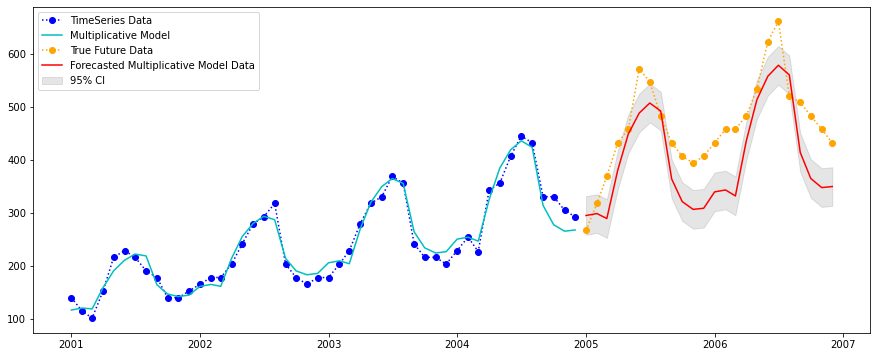

In [67]:
plt.figure(figsize=(15,6))
# Fitted Data
plt.plot(df_train2['Years'], df_train2['Sales'], 'bo:')
plt.plot(df_train2['Years'], df_train2['Fitted_Values'], 'c') # Fitted

# Forecasted Data
plt.plot(df_test2['Years'], df_test2['Sales'], 'o:', color='orange')
plt.plot(df_test2['Years'], df_test2['Forecasted_mul'], 'red')

# Margin of Error
CI_Plus = df_test2['Forecasted_mul'] + ME
CI_Mins = df_test2['Forecasted_mul'] - ME

plt.fill_between(df_test2['Years'],(CI_Plus.ravel()),(CI_Mins.ravel()), alpha=0.1, color='black')
plt.legend(['TimeSeries Data', 'Multiplicative Model', 'True Future Data', 'Forecasted Multiplicative Model Data', '95% CI'])
plt.show()